# Can we predict who would've survived the Titanic?

## Step 0: Why EDA?


Not all data comes in a neat little package ready to be modelled by the latest and greatest machine learning models.

Most of the time, you'll get a dataset you don't know much about. So before you can make any solid predictions, you'll to find out more.

This is where EDA comes in.

The main thing to remember is the first word. Exploratory. You're trying to figure out more about the data so you can build a model the best way you can.

You'll usually do this when you first look at a dataset but it'll continually happen as you learn more. EDA is an iterative process. There's no one way to do it either. It'll vary with each new dataset but there are some things you'll find yourself doing more often, we'll talk about those in this notebook and in a future blog post.


## Step 1: Download the data

You can download the data for this notebook here: https://www.kaggle.com/c/titanic/data

## Step 2: Work through the notebook
    
First we will import all the relevant dependencies we need.

If you don't have any of these, the notebook will throw an error. The error will likely tell you what you don't have. Then you'll have to install it.

You can usually figure out how to install it by Googling: "how to install [the thing you don't have]".

**PS** If you have any questions, feedback, advice or bug fixes, please let me know.

# Titanic Dataset

### Import Libraries

In [75]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `data`.

### The Data

In [76]:
# TODO: Import titanic data from folder data ! store in `df`!
df = pd.read_csv('/Users/renyoktavianti/miniconda3/envs/DSC-Repository/[GOLD] Chapter 5/titanic_train.csv')

In [77]:
# TODO: View the head of `df`,  data !
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
for column_name, number_of_null in zip(df.columns, df.isnull().sum()):
    print(column_name, number_of_null)

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


#### Check Name

In [79]:
from collections import Counter

In [80]:
for x in df['Name'].values:
    print(x)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

In [81]:
for idx, name in enumerate(df['Name']):
    if "(" in name and ")" in name:
        print(df['Name'].values[idx], df['SibSp'].values[idx], df['Parch'].values[idx])

Cumings, Mrs. John Bradley (Florence Briggs Thayer) 1 0
Futrelle, Mrs. Jacques Heath (Lily May Peel) 1 0
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) 0 2
Nasser, Mrs. Nicholas (Adele Achem) 1 0
Hewlett, Mrs. (Mary D Kingcome)  0 0
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele) 1 0
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson) 1 5
Spencer, Mrs. William Augustus (Marie Eugenie) 1 0
Ahlin, Mrs. Johan (Johanna Persdotter Larsson) 1 0
Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott) 1 0
Arnold-Franchi, Mrs. Josef (Josefine Franchi) 1 0
Harper, Mrs. Henry Sleeper (Myna Haxtun) 1 0
Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson) 1 0
Nye, Mrs. (Elizabeth Ramell) 0 0
Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson) 3 0
Doling, Mrs. John T (Ada Julia Bone) 0 1
Petroff, Mr. Pastcho ("Pentcho") 0 0
Robins, Mrs. Alexander A (Grace Charity Laury) 1 0
Weisz, Mrs. Leopold (Mathilde Francoise Pede) 1 0
Boulos, Mrs. Joseph (Sultana) 0 2
Hakkarainen, Mrs. Pekka

In [82]:
words = [word for sentence in df['Name'].apply(lambda x: x.split()) for word in sentence]

In [83]:
sorted(Counter(words).items(), key=lambda x:x[1], reverse=True)

[('Mr.', 517),
 ('Miss.', 182),
 ('Mrs.', 125),
 ('William', 62),
 ('John', 44),
 ('Master.', 40),
 ('Henry', 33),
 ('James', 24),
 ('Charles', 23),
 ('George', 22),
 ('Thomas', 21),
 ('Edward', 18),
 ('Joseph', 16),
 ('Johan', 15),
 ('Frederick', 15),
 ('Mary', 13),
 ('Richard', 13),
 ('Samuel', 13),
 ('Arthur', 13),
 ('Alfred', 12),
 ('Anna', 11),
 ('Jr', 10),
 ('Elizabeth', 9),
 ('Andersson,', 9),
 ('Alexander', 9),
 ('Ernest', 9),
 ('Robert', 9),
 ('Karl', 9),
 ('Peter', 9),
 ('J', 8),
 ('Leonard', 8),
 ('H', 8),
 ('Margaret', 8),
 ('Albert', 8),
 ('Martin', 8),
 ('Victor', 8),
 ('Maria', 7),
 ('Sage,', 7),
 ('Dr.', 7),
 ('de', 7),
 ('Johnson,', 6),
 ('E', 6),
 ('Panula,', 6),
 ('(Elizabeth', 6),
 ('Goodwin,', 6),
 ('Skoog,', 6),
 ('Francis', 6),
 ('Helen', 6),
 ('Frank', 6),
 ('Sofia', 6),
 ('Rev.', 6),
 ('Alice', 6),
 ('Carter,', 6),
 ('Rice,', 5),
 ('Anne', 5),
 ('Gustaf', 5),
 ('Walter', 5),
 ('David', 5),
 ('Patrick', 5),
 ('August', 5),
 ('Harry', 5),
 ('(Anna', 5),
 ('Annie'

In [84]:
list_of_titles = {'Mr.':'male', 'Miss.':'female', 'Mrs.':'female'}

In [85]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [86]:
for name, sex in zip(df['Name'], df['Sex']):
    for title in list_of_titles:
        if title in name:
            if list_of_titles[title] != sex:
                print(list_of_titles[title],sex)

### Apakah jenis kelamin memiliki korelasi terhadap keselamatan penumpang

In [87]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [88]:
df.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [89]:
"""
Female total: 233/314 = 74.2%
Male Total: 109/577 = 18.9%
"""

'\nFemale total: 233/314 = 74.2%\nMale Total: 109/577 = 18.9%\n'

### Apakah jenis class (Pclass) memiliki korelasi yang besar terhadap keselamatan penumpang

In [90]:
df['dependent'] = np.sum((df['Parch'], df['SibSp']),axis=0)

In [91]:
df.groupby(['Survived','dependent']).count()['PassengerId']

Survived  dependent
0         0            374
          1             72
          2             43
          3              8
          4             12
          5             19
          6              8
          7              6
          10             7
1         0            163
          1             89
          2             59
          3             21
          4              3
          5              3
          6              4
Name: PassengerId, dtype: int64

In [92]:
# Data survived = 0
print(374/(374+163))
print(72/(72+89))
print(43/(43+21))
print(8/(8+3))
print(12/(12+3))
print(19/(19+4))
print("="*50)
# Data survived = 1
print(163/(374+163))
print(89/(72+89))
print(21/(43+21))
print(3/(8+3))
print(3/(12+3))
print(4/(19+4))

0.6964618249534451
0.4472049689440994
0.671875
0.7272727272727273
0.8
0.8260869565217391
0.30353817504655495
0.5527950310559007
0.328125
0.2727272727272727
0.2
0.17391304347826086


In [93]:
df[['Survived','dependent', 'SibSp', 'Parch']].corr()

,Survived,dependent,SibSp,Parch
Survived,1.000000,0.016639,-0.035322,0.081629
dependent,0.016639,1.000000,0.890712,0.783111
SibSp,-0.035322,0.890712,1.000000,0.414838
Parch,0.081629,0.783111,0.414838,1.000000


### Apakah pangkat/gelar dari nama penumpang berkorelasi dengan keselamatan penumpang?

In [94]:
title_2 = []
for name, sex in zip(df['Name'], df['Sex']):
    is_break = False
    for title in list_of_titles:
        if title in name:
            title_2.append(title)
            is_break = True
            break
    if is_break == False:
        title_2.append(None)
df['title_2'] = title_2

In [95]:
df[['Title','title_2','Survived']].groupby(['Title']).mean().sort_values('Survived')

/var/folders/rl/656p168126zbnjcj2zhnms3r0000gn/T/ipykernel_39818/3988728263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['Title','title_2','Survived']].groupby(['Title']).mean().sort_values('Survived')


,Survived
Title,
Capt,0.000000
Don,0.000000
Jonkheer,0.000000
Rev,0.000000
Mr,0.156673
Dr,0.428571
Col,0.500000
Major,0.500000
Master,0.575000


In [96]:
df[['Title','title_2','Survived']].groupby(['title_2']).mean().sort_values('Survived')

/var/folders/rl/656p168126zbnjcj2zhnms3r0000gn/T/ipykernel_39818/78298973.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['Title','title_2','Survived']].groupby(['title_2']).mean().sort_values('Survived')


,Survived
title_2,
Mr.,0.156673
Miss.,0.697802
Mrs.,0.792000


### Apakah yang muda yang survive?

In [97]:
import seaborn as sns

In [ ]:
# TODO: Plot with Histogram chart for Age distribution from `df'

In [98]:
df.loc[pd.isna(df['Age'])]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

/var/folders/rl/656p168126zbnjcj2zhnms3r0000gn/T/ipykernel_39818/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

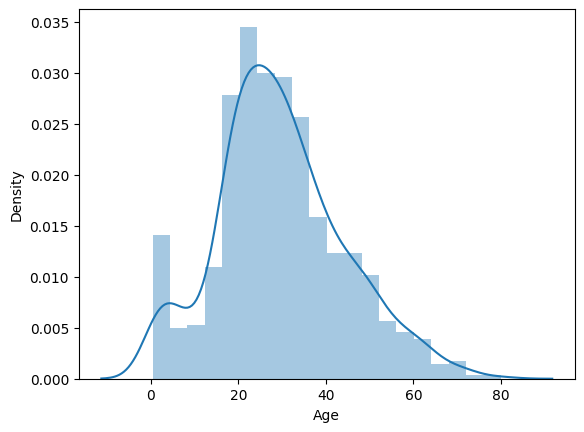

In [99]:
sns.distplot(df['Age'])

In [100]:
print(df['Age'].mean())
print(df['Age'].median())

29.69911764705882
28.0


In [101]:
train_data_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(train_data_mean)

/var/folders/rl/656p168126zbnjcj2zhnms3r0000gn/T/ipykernel_39818/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

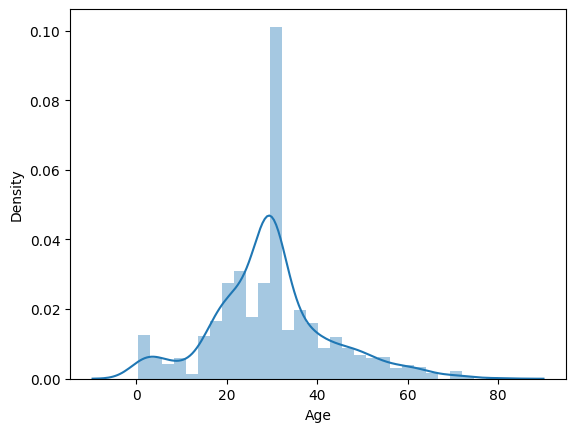

In [102]:
sns.distplot(df['Age'])

In [103]:
top_age = np.quantile(df['Age'], 0.975)
bottom_age = np.quantile(df['Age'], 0.025)

In [104]:
df.loc[df['Age']>top_age].shape

(22, 15)

In [105]:
df['Age'] = df['Age'].apply(lambda x: np.ceil(x))

In [106]:
print(df['Age'].median())
print(df['Age'].mean())

30.0
29.77104377104377


### Check Cabin attribute

In [107]:
df['Cabin'].value_counts()[:10]

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
F2             3
E101           3
D              3
C78            2
C93            2
Name: Cabin, dtype: int64

In [108]:
df['Cabin_class'] = df['Cabin'].apply(lambda x: x[0] if pd.isna(x) == False else None)

In [109]:
df[['Cabin_class','Survived']].groupby(['Cabin_class']).mean()

,Survived
Cabin_class,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [110]:
df[['Cabin_class','Survived']].groupby(['Cabin_class']).count()

,Survived
Cabin_class,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1


In [111]:
df.loc[df['Cabin_class'].isin(['B','D','E'])]['Pclass'].value_counts()

1    101
2      8
3      3
Name: Pclass, dtype: int64

In [112]:
df.loc[~df['Cabin_class'].isin(['B','D','E'])]['Pclass'].value_counts()

3    488
2    176
1    115
Name: Pclass, dtype: int64

# DF

In [113]:
value_counts_of_cabin = { x:y for x, y in df['Cabin'].value_counts().items()}

In [114]:
embarked_dict = {"S":0,"C":1,"Q":2}

In [115]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [116]:
df['Embarked'] = df['Embarked'].apply(lambda x: embarked_dict.get(x))

In [117]:
df['dependent'] = df['dependent'].apply(lambda x: x+1)

In [118]:
df['true_fare'] = [x/y for x,y in zip(df['Fare'], df['dependent'])]

In [119]:
df.groupby('Pclass').mean()['true_fare']

/var/folders/rl/656p168126zbnjcj2zhnms3r0000gn/T/ipykernel_39818/3031901776.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Pclass').mean()['true_fare']


Pclass
1    52.936943
2    12.698832
3     8.094756
Name: true_fare, dtype: float64

In [120]:
average_price_per_cabin_class = {x: y for x, y in df.groupby(['Cabin_class']).mean()['true_fare'].items()}

/var/folders/rl/656p168126zbnjcj2zhnms3r0000gn/T/ipykernel_39818/535460815.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_price_per_cabin_class = {x: y for x, y in df.groupby(['Cabin_class']).mean()['true_fare'].items()}


In [121]:
average_price_per_cabin_class

{'A': 32.7681,
 'B': 69.37956595744681,
 'C': 52.273987005649715,
 'D': 34.384262626262625,
 'E': 29.177041145833332,
 'F': 9.05021282051282,
 'G': 4.963020833333333,
 'T': 35.5}

In [122]:
new_cabin_class = []
for cabin_class,true_fare in zip(df['Cabin_class'],df['true_fare']):
    if cabin_class is None:
        min_diff_class = None
        min_diff = 99999999
        for cabin_class_data, avg_fare in average_price_per_cabin_class.items():
            difference_of_fare = abs(true_fare-avg_fare)
            if  difference_of_fare < min_diff:
                min_diff_class = cabin_class_data
                min_diff = difference_of_fare
        new_cabin_class.append(min_diff_class)
    else:
        new_cabin_class.append(cabin_class)

In [123]:
df['new_cabin_class'] = new_cabin_class

In [124]:
df['new_cabin_class'].value_counts()

F    482
G    160
C     70
E     64
B     59
D     33
A     18
T      5
Name: new_cabin_class, dtype: int64

In [125]:
df[['Cabin_class','Survived']].groupby('Cabin_class').mean()

,Survived
Cabin_class,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [126]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,dependent,title_2,Cabin_class,true_fare,new_cabin_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,2,Mr.,None,3.62500,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,2,Mrs.,C,35.64165,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,1,Miss.,None,7.92500,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,Mrs,2,Mrs.,C,26.55000,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,Mr,1,Mr.,None,8.05000,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0.0,Rev,1,None,None,13.00000,F
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0.0,Miss,1,Miss.,B,30.00000,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,0.0,Miss,4,Miss.,None,5.86250,G
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1.0,Mr,1,Mr.,C,30.00000,C


### Heat Map

<Axes: >

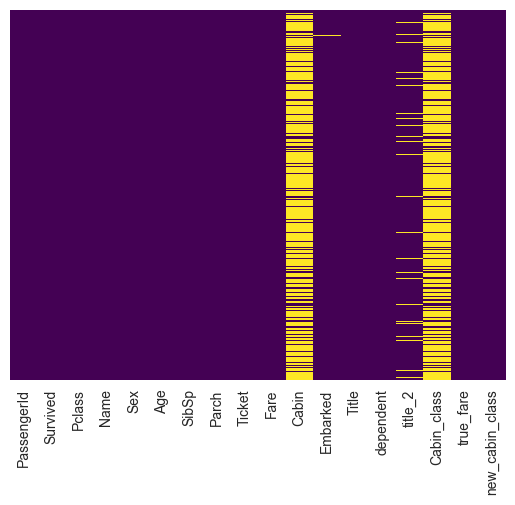

In [144]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20% of the age data is missing. The proportion of age missing is likely small enough for reasonable replacement with some form of imputation looking at the cabin column, it looks like we are just missing too much of that data to do something usweful with at a baic level. We will probably drop this later, or change it to another feature like "Cabin known: 1 or 0"

### Classification

<Axes: xlabel='Survived', ylabel='count'>

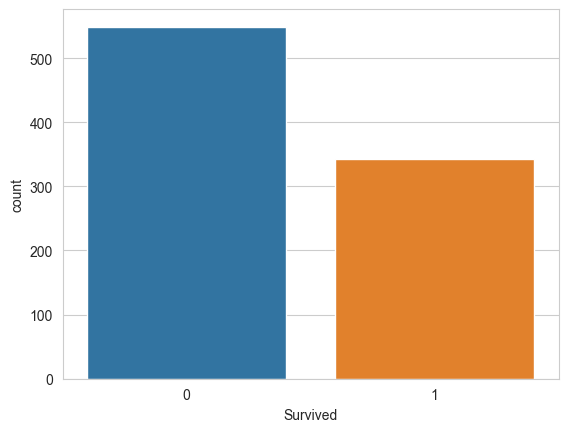

In [145]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Survived', ylabel='count'>

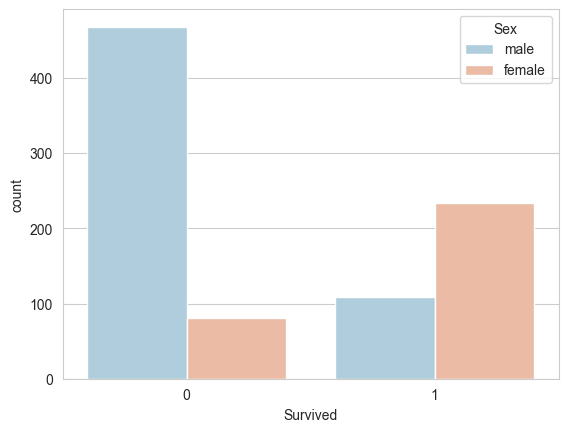

In [129]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue="Sex",palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

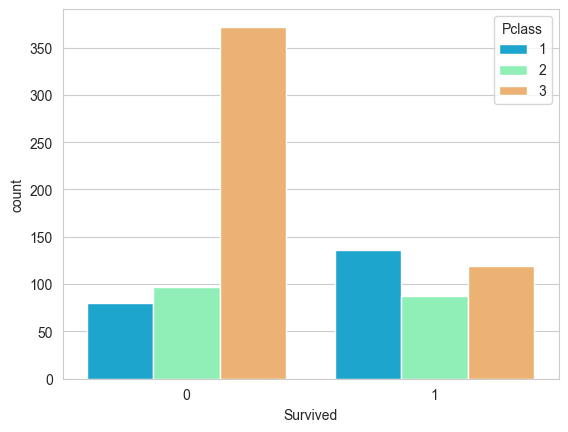

In [146]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

/var/folders/rl/656p168126zbnjcj2zhnms3r0000gn/T/ipykernel_39818/2002818437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

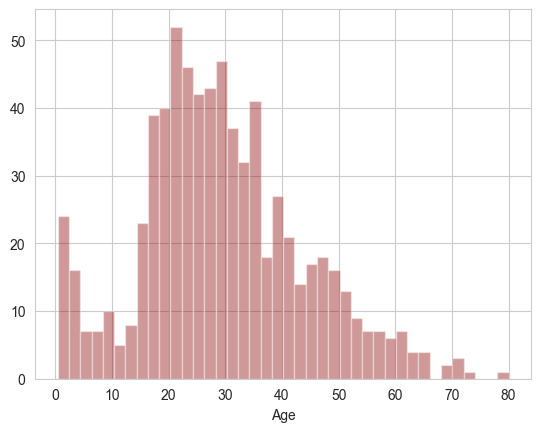

In [131]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

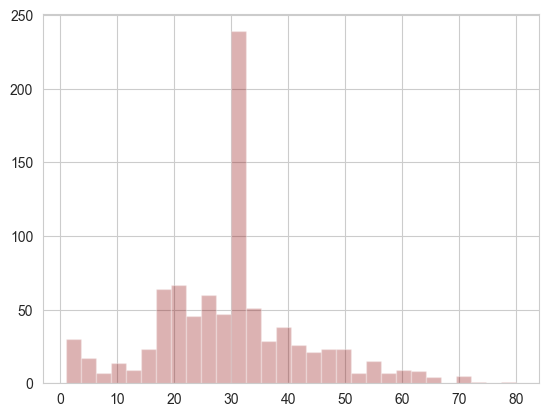

In [147]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

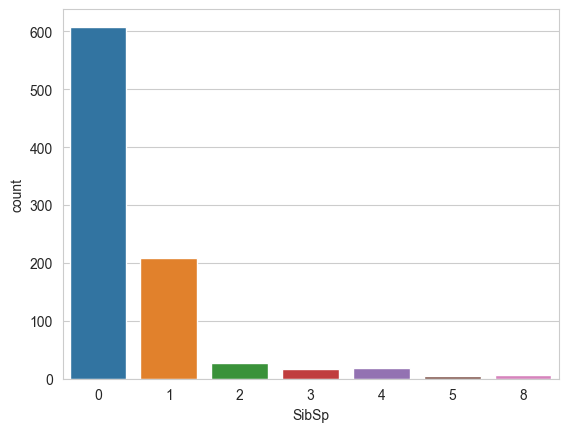

In [148]:
sns.countplot(x='SibSp',data=df)

<Axes: >

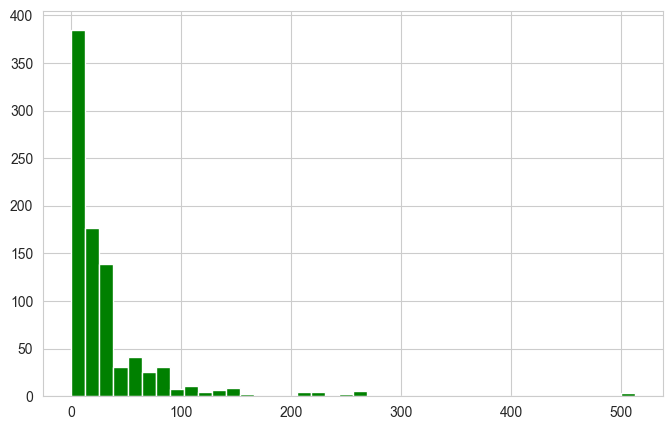

In [149]:
df['Fare'].hist(color='green',bins=40,figsize=(8,5))

### Cufflinks for plots

In [136]:
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67903 sha256=e6264fc1b95fbcd137e84f03b398354d630e3985b63c1dece8ea8e08282dc637
  Stored in directory: /Users/renyoktavianti/Library/Caches/pip/wheels/29/b4/f8/2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [150]:
import cufflinks as cf
cf.go_offline()

In [151]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

### Data cleaning

We want to fill the missing data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers. however we can check the average age by passenger class.

<Axes: xlabel='Pclass', ylabel='Age'>

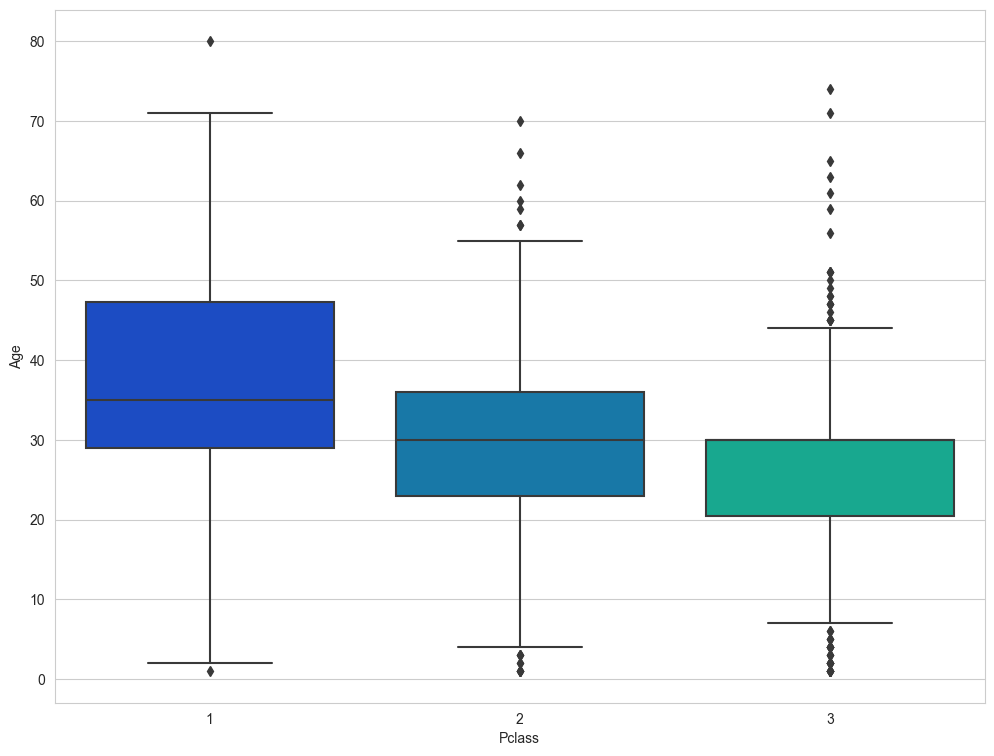

In [152]:
plt.figure(figsize=(12,9))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see that whether passengers in the higher classes tend to be older, which makes sense. We will use these average age values to impute based on Pclass for Age

In [153]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

Applying the above function

In [154]:
df['Age'] = df[['Age','Pclass']].apply(input_age,axis=1)

Check the heatmap again

<Axes: >

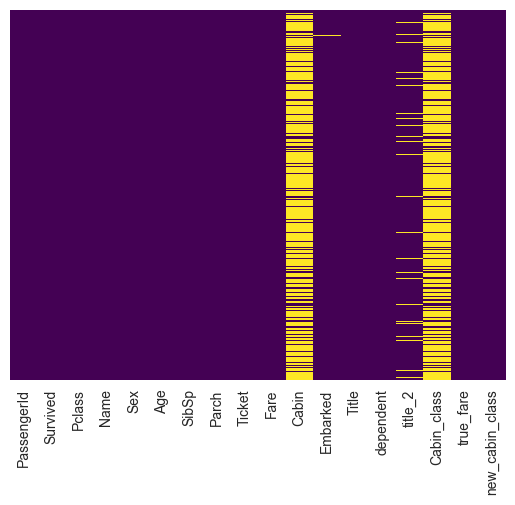

In [155]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the Cabin column and the row in Embarked that is NaN

In [156]:
df.drop('Cabin',axis=1,inplace=True)

In [157]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,dependent,title_2,Cabin_class,true_fare,new_cabin_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0.0,Mr,2,Mr.,None,3.62500,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.0,Mrs,2,Mrs.,C,35.64165,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss,1,Miss.,None,7.92500,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.0,Mrs,2,Mrs.,C,26.55000,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0.0,Mr,1,Mr.,None,8.05000,F


In [158]:
df.dropna(inplace=True)

### Converting Categorical Features

We will need to convert the categorical features to dummy variables using pandas! Otherwise our machine learning algorithm would not be able to directly take in those features as inputs

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      182 non-null    int64  
 1   Survived         182 non-null    int64  
 2   Pclass           182 non-null    int64  
 3   Name             182 non-null    object 
 4   Sex              182 non-null    object 
 5   Age              182 non-null    float64
 6   SibSp            182 non-null    int64  
 7   Parch            182 non-null    int64  
 8   Ticket           182 non-null    object 
 9   Fare             182 non-null    float64
 10  Embarked         182 non-null    float64
 11  Title            182 non-null    object 
 12  dependent        182 non-null    int64  
 13  title_2          182 non-null    object 
 14  Cabin_class      182 non-null    object 
 15  true_fare        182 non-null    float64
 16  new_cabin_class  182 non-null    object 
dtypes: float64(4), i

In [160]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,1.0,2.0
1,1,0
3,0,0
6,0,0
10,0,0
11,0,0


In [162]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [163]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [164]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,dependent,title_2,Cabin_class,true_fare,new_cabin_class
1,2,1,1,38.0,1,0,71.2833,Mrs,2,Mrs.,C,35.641650,C
3,4,1,1,35.0,1,0,53.1000,Mrs,2,Mrs.,C,26.550000,C
6,7,0,1,54.0,0,0,51.8625,Mr,1,Mr.,E,51.862500,E
10,11,1,3,4.0,1,1,16.7000,Miss,3,Miss.,G,5.566667,G
11,12,1,1,58.0,0,0,26.5500,Miss,1,Miss.,C,26.550000,C


In [167]:
df = pd.concat([df,sex,embark],axis=1)

In [168]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,dependent,title_2,Cabin_class,true_fare,new_cabin_class,male,1.0,2.0
1,2,1,1,38.0,1,0,71.2833,Mrs,2,Mrs.,C,35.641650,C,0,1,0
3,4,1,1,35.0,1,0,53.1000,Mrs,2,Mrs.,C,26.550000,C,0,0,0
6,7,0,1,54.0,0,0,51.8625,Mr,1,Mr.,E,51.862500,E,1,0,0
10,11,1,3,4.0,1,1,16.7000,Miss,3,Miss.,G,5.566667,G,0,0,0
11,12,1,1,58.0,0,0,26.5500,Miss,1,Miss.,C,26.550000,C,0,0,0


Our data is ready for our model

### Building a Logistic Regression model

Splitting the data into training set and test set

### Train Test Split

In [169]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,dependent,title_2,Cabin_class,true_fare,new_cabin_class,male,1.0,2.0
1,2,1,38.0,1,0,71.2833,Mrs,2,Mrs.,C,35.641650,C,0,1,0
3,4,1,35.0,1,0,53.1000,Mrs,2,Mrs.,C,26.550000,C,0,0,0
6,7,1,54.0,0,0,51.8625,Mr,1,Mr.,E,51.862500,E,1,0,0
10,11,3,4.0,1,1,16.7000,Miss,3,Miss.,G,5.566667,G,0,0,0
11,12,1,58.0,0,0,26.5500,Miss,1,Miss.,C,26.550000,C,0,0,0


In [170]:
df['Survived'].head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

### Accuracy, Training  and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\MOHD. RAEES\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = confusion_matrix(y_test,predictions)

In [ ]:
accuracy

array([[149,  14],
       [ 39,  65]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8014981273408239

In [ ]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# Analyzed by


𝐌𝐝 𝐑𝐚𝐢𝐞𝐬𝐡,
Enrollment number : 𝟏𝟗𝐔𝐌𝐄𝟏𝟏𝟔,
Registration number : 𝟏𝟗𝟏𝟏𝟑𝟒𝟓,
B Tech,7𝐭𝐡 semester,Section : 𝐀,
Mechanical Engineering Department,
National Institute of Technology Agartala, Tripura 799046,

